In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("whitegrid")

INPUT_PATH = "../../data/processed/newtons_second_law_cleaned_dataset.csv"
OUTPUT_PATH = "../../data/processed/newtons_second_law_cleaned_dataset.csv"

if not os.path.exists(INPUT_PATH):
    raise FileNotFoundError(f"Processed dataset not found at: {INPUT_PATH}")

In [7]:
df = pd.read_csv(INPUT_PATH)
print(f"Loaded cleaned dataset: {df.shape[0]} rows × {df.shape[1]} columns")
df.head()

Loaded cleaned dataset: 3000 rows × 3 columns


,Mass_kg,Acceleration_ms2,Force_N
0,4.058131,13.486790,54.731161
1,9.531786,15.953960,152.069729
2,7.453942,5.084311,37.898163
3,6.187256,12.534995,77.557215
4,1.982177,11.477745,22.750923


In [8]:
df["mass_x_acceleration"] = df["Mass_kg"] * df["Acceleration_ms2"]

df["log_mass"] = np.log(df["Mass_kg"])
df["log_acceleration"] = np.log(df["Acceleration_ms2"])
df["log_force"] = np.log(df["Force_N"])

In [9]:
correlation = df.corr(numeric_only=True)["Force_N"].sort_values(ascending=False)
print("Feature correlation with target (Force):\n", correlation)

Feature correlation with target (Force):
 mass_x_acceleration    1.000000
Force_N                1.000000
log_force              0.850924
Acceleration_ms2       0.689683
Mass_kg                0.624198
log_acceleration       0.614780
log_mass               0.590820
Name: Force_N, dtype: float64


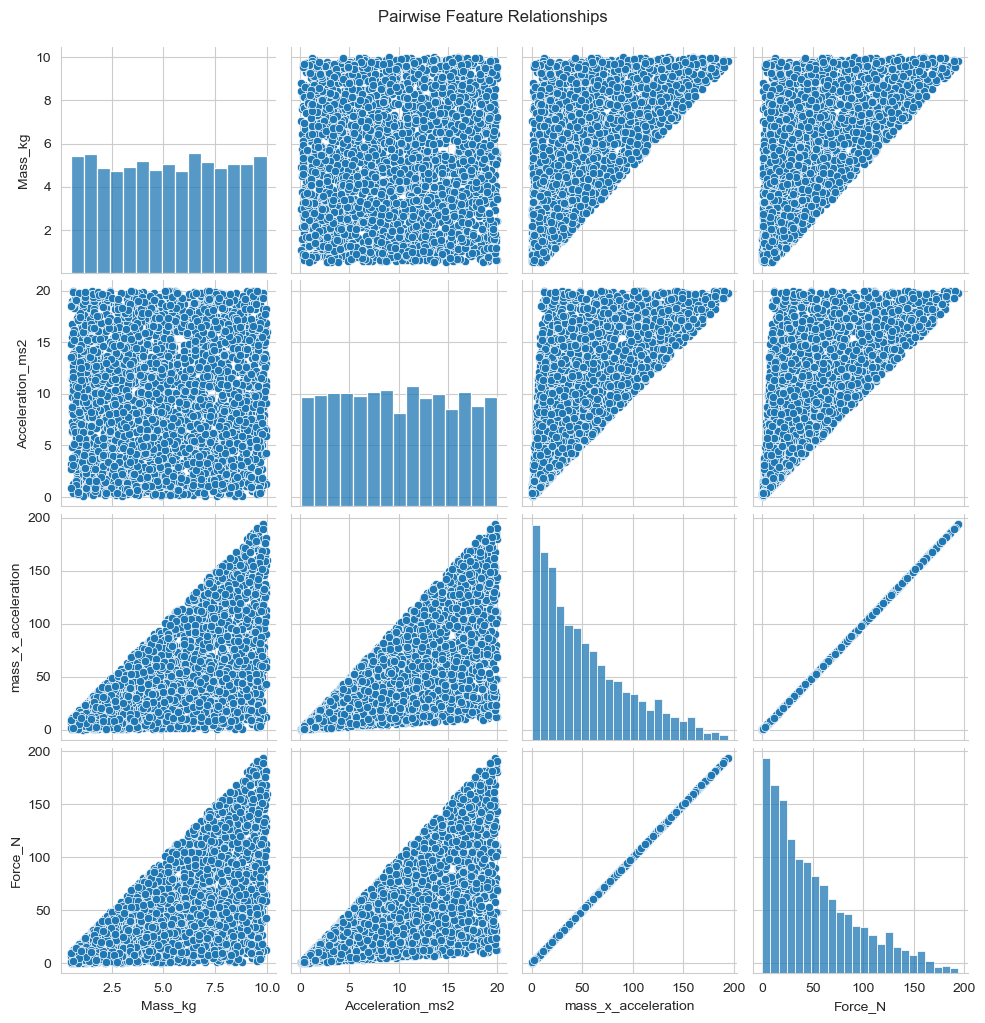

In [10]:
sns.pairplot(df[["Mass_kg", "Acceleration_ms2", "mass_x_acceleration", "Force_N"]])
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

In [11]:
os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)
df.to_csv(OUTPUT_PATH, index=False)
print(f"Feature-engineered dataset saved to: {OUTPUT_PATH}")

Feature-engineered dataset saved to: ../../data/processed/newtons_second_law_cleaned_dataset.csv
